<a href="https://colab.research.google.com/github/dralvima/IITmethods/blob/main/Allen_spike_trials_PyPhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TIME SERIES OF PHI** and related measures (e.g., number of mechanisms x arity)

First, let's install PyPhi for IIT4.0

In [11]:
!pip install -U git+https://github.com/wmayner/pyphi.git@feature/iit-4.0
import itertools
import pyphi
# Disable PyPhi progress bars and welcome message
pyphi.config.PROGRESS_BARS = False
pyphi.config.WELCOME_OFF = True

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

  Cloning https://github.com/wmayner/pyphi.git (to revision feature/iit-4.0) to /tmp/pip-req-build-qmjntef6
  Running command git clone --filter=blob:none --quiet https://github.com/wmayner/pyphi.git /tmp/pip-req-build-qmjntef6
  Resolved https://github.com/wmayner/pyphi.git to commit f8572c75269be69d28fba3f48223f3a93654233e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


**Next, let's access DANDI and grab data in NWB format**

In [2]:
!pip install dandi

!pip install pynwb
from pynwb import NWBHDF5IO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.0/332.0 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.0/134.0 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup

The data we are interested in is: https://dandiarchive.org/dandiset/000021?search=000021&pos=1

Allen Institute October 2019 Mouse extracellular electrophysiology data approximately matching two-photon brain observatory stimulus set.

https://portal.brain-map.org/explore/circuits/visual-coding-neuropixels


In [3]:
!dandi download https://dandiarchive.org/dandiset/000021/draft/files?location=sub-699733573%2F

PATH                                                                  SIZE     DONE            DONE% CHECKSUM STATUS          MESSAGE
sub-699733573/sub-699733573_ses-715093703_probe-810755797_ecephys.nwb 2.1 GB   2.1 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755799_ecephys.nwb 2.5 GB   2.5 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755801_ecephys.nwb 2.2 GB   2.2 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755803_ecephys.nwb 2.3 GB   2.3 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703.nwb                         2.9 GB   2.9 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755807_ecephys.nwb 1.3 GB   1.3 GB           100%    ok    done                   
sub-699733573/sub-699733573_ses-715093703_probe-810755805_ecep

In [4]:
filepath = '/content/sub-699733573/sub-699733573_ses-715093703.nwb'
io = NWBHDF5IO(filepath, 'r',load_namespaces = True)  # open the file in read mode 'r'
nwb = io.read() # nwb dataset

/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/usr/local/lib/python3.10/dist-packages/hdmf/spec/namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.6.0-alpha is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


**Select trials (by stimulus)**

options are:

flashes_presentations

static_gratings_presentations

gabors_presentations

natural_scenes_presentations

drifting_gratings_presentations

natural_movie_one_presentations

natural_movie_three_presentations

spontaneous_presentations

In [ ]:
# grab all the flash presentation data
intervals_dict = nwb.intervals
print(intervals_dict)
stimulus_presentations = intervals_dict['drifting_gratings_presentations'].to_dataframe()
stim_on_times = stimulus_presentations.start_time[:].to_numpy()
N_trials = len(stim_on_times)

# extract spiking data

In [18]:
# make a dataframe of the units
units_df = nwb.units.to_dataframe()
units_df.columns

Index(['snr', 'quality', 'presence_ratio', 'spread', 'cumulative_drift',
       'isolation_distance', 'amplitude', 'firing_rate', 'nn_hit_rate',
       'isi_violations', 'velocity_below', 'l_ratio', 'nn_miss_rate',
       'waveform_halfwidth', 'repolarization_slope', 'amplitude_cutoff',
       'PT_ratio', 'silhouette_score', 'recovery_slope', 'waveform_duration',
       'local_index', 'max_drift', 'velocity_above', 'cluster_id',
       'peak_channel_id', 'd_prime', 'spike_times', 'spike_amplitudes',
       'waveform_mean'],
      dtype='object')

In [20]:
# determine the brain areas that each electrode was recorded in
elLocationLabel = nwb.electrodes["location"].data[:]
import numpy as np
x = np.array(elLocationLabel)
locIdx_LGd = np.where(x == 'LGd')
locIdx_VISp = np.where(x == 'VISp')
locIdx_VISpm = np.where(x == 'VISpm')
locIdx_VISl = np.where(x == 'VISl')
locIdx_VISrl = np.where(x == 'VISrl')
# map the locations to specific probe IDs
elLocationID = nwb.electrodes["id"].data[:]
elID_LGd   = elLocationID[locIdx_LGd]
elID_VISp   = elLocationID[locIdx_VISp]
elID_VISpm   = elLocationID[locIdx_VISpm]
elID_VISl   = elLocationID[locIdx_VISl]
elID_VISrl   = elLocationID[locIdx_VISrl]

# Find 'good' units
y = np.array(units_df.quality)
goodUnit = np.where(y == 'good')[0]
cids = units_df.peak_channel_id.to_list()
unitsToUse_idx_LGd = [a for a in goodUnit if cids[a] in elID_LGd]
unitsToUse_idx_VISp = [a for a in goodUnit if cids[a] in elID_VISp]
unitsToUse_idx_VISpm = [a for a in goodUnit if cids[a] in elID_VISpm]
unitsToUse_idx_VISl = [a for a in goodUnit if cids[a] in elID_VISl]
unitsToUse_idx_VISrl = [a for a in goodUnit if cids[a] in elID_VISrl]
# collect good units per area
unitsToUse_LGd = nwb.units[unitsToUse_idx_LGd]
unitsToUse_VISp = nwb.units[unitsToUse_idx_VISp]
unitsToUse_VISpm = nwb.units[unitsToUse_idx_VISpm]
unitsToUse_VISl = nwb.units[unitsToUse_idx_VISl]
unitsToUse_VISrl = nwb.units[unitsToUse_idx_VISrl]

**TRIAL-AVERAGE to get stimulus-locked RESPONSES**

In [21]:
# define time window pre and post stimulus onset
pre = 0.5
post = 2
dt = 10. / 1000 # 10 ms bins
T_trial = int((pre + post) / dt) # number of time bins in a trial
bin_edges = -pre + np.arange(T_trial+1) * dt

*compute V1 response*

In [26]:
unitsToUse = unitsToUse_VISp

# Construct trials for
N_neurons = len(unitsToUse) # for V1/VISp there are 135 'good' units
ys = []
for time in stim_on_times:
  y_trial = np.zeros((T_trial, N_neurons))
  for unit in range(N_neurons):
    unit_spike_times = unitsToUse['spike_times'].iloc[unit]
    # compute spike times relative to stimulus onset
    aligned_spikes = unit_spike_times - time
    # keep only spike times in a given time window around the stimulus onset
    aligned_spikes = aligned_spikes[(-pre < aligned_spikes) & (aligned_spikes < post)]
    # bin spikes
    y_trial[:,unit] = np.histogram(aligned_spikes, bins=bin_edges)[0]
  ys.append(y_trial.astype(int))

**PLOT**

*example neuron*

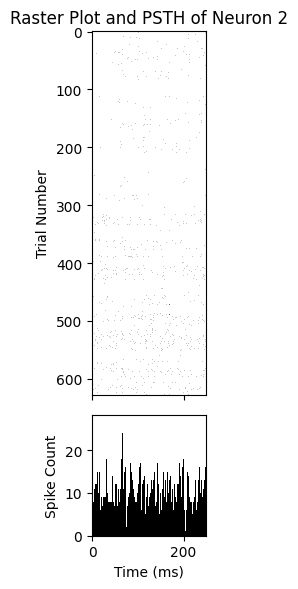

In [58]:
# We now have all the spikes in ys (135 neurons x 628 trials x 250ms)

# Let's choose a neuron, for example, the first neuron again
neuron_index = 1  # selecting the first neuron
neuron_data = [trial[:, neuron_index] for trial in ys]

# Converting the list of arrays into a single 2D array for plotting
neuron_data_array = np.array(neuron_data)

# Computing the PSTH
psth = np.sum(neuron_data_array, axis=0)


# Creating a combined plot with the raster plot and the PSTH
fig, (ax_raster, ax_psth) = plt.subplots(2, 1, figsize=(2, 6), gridspec_kw={'height_ratios': [3, 1]}, sharex=True)

# Raster plot
ax_raster.imshow(neuron_data_array, cmap='Greys', aspect='auto', interpolation='none')
ax_raster.set_ylabel('Trial Number')
ax_raster.set_title(f'Raster Plot and PSTH of Neuron {neuron_index + 1}')

# PSTH plot
ax_psth.bar(range(250), psth, width=1.0, color='black')
ax_psth.set_ylabel('Spike Count')
ax_psth.set_xlabel('Time (ms)')

plt.tight_layout()
plt.show()

*all neurons*

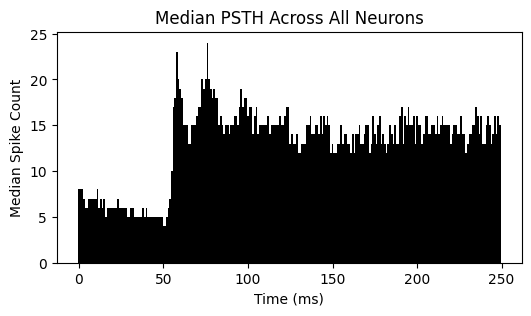

In [101]:
# Computing the PSTH for each neuron and then taking the median across all neurons

# Initializing an empty list to store PSTH for each neuron
psth_all_neurons = []

# Looping through each neuron to compute its PSTH
for i in range(135):  # Assuming there are 135 neurons
    neuron_data = [trial[:, i] for trial in ys]
    neuron_data_array = np.array(neuron_data)
    psth_neuron = np.sum(neuron_data_array, axis=0)
    psth_all_neurons.append(psth_neuron)

# Converting the list of PSTHs into an array and computing the median PSTH
psth_all_neurons_array = np.array(psth_all_neurons)
median_psth = np.median(psth_all_neurons_array, axis=0)

# Plotting the median PSTH
plt.figure(figsize=(6, 3))
plt.bar(range(250), median_psth, width=1.0, color='black')
plt.title('Median PSTH Across All Neurons')
plt.xlabel('Time (ms)')
plt.ylabel('Median Spike Count')
plt.show()

Let's grab three neurons that respond well and are quite active overall

**LET's CREATE TPMS!!!**

In [ ]:
# Step 1: Create matrices for each trial

# Selecting the data for the three chosen neurons
neuron_indices = [11, 22, 57]
trial_matrices = []

for trial in ys:
    trial_matrix = np.array([trial[:, neuron_indices[0]],
                             trial[:, neuron_indices[1]],
                             trial[:, neuron_indices[2]]])
    trial_matrices.append(trial_matrix)


*Just out of curiosity, let's try with and without NaNs*

In [ ]:
def compute_tpm(trial_matrix):
    """
    Compute the Transition Probability Matrix (TPM) for a given trial.
    The TPM is an 8x8 matrix for the 8 possible states of 3 neurons.
    """
    # Define all possible states for 3 neurons
    states = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]

    # Initialize the TPM with zeros
    tpm = np.zeros((8, 8))

    # Count transitions between states
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])

        if current_state in states and next_state in states:
            current_index = states.index(current_state)
            next_index = states.index(next_state)
            tpm[current_index, next_index] += 1

    # Normalize the TPM by row to get probabilities
    row_sums = tpm.sum(axis=1, keepdims=True)
    tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums!=0)

    return tpm_normalized

# Computing the TPM for each trial
tpms = [compute_tpm(matrix) for matrix in trial_matrices]

*Keep track of how much trial-averaging improves our TPM:*

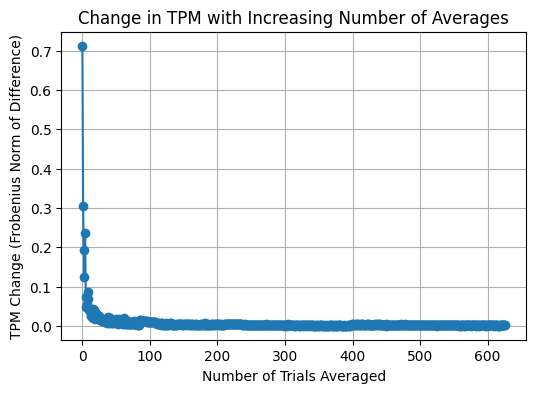

In [102]:
def average_tpms(tpms, skip_nans=False):
    """
    Compute the average TPM from a list of TPMs.
    If skip_nans is True, TPMs containing NaNs are skipped.
    Otherwise, nanmean is used for averaging.
    """
    if skip_nans:
        # Filter out TPMs with NaNs
        tpms_filtered = [tpm for tpm in tpms if not np.isnan(tpm).any()]
        average_tpm = np.mean(tpms_filtered, axis=0)
    else:
        # Use nanmean to ignore NaNs in the averaging process
        average_tpm = np.nanmean(tpms, axis=0)

    return average_tpm

# Computing the two types of average TPMs
average_tpm_excluding_nans = average_tpms(tpms, skip_nans=True)
average_tpm_nanmean = average_tpms(tpms, skip_nans=False)

# Function to calculate the similarity between two TPMs
def tpm_similarity(tpm1, tpm2):
    """
    Calculate a similarity measure between two TPMs.
    Here, we'll use the Frobenius norm of the difference between the two TPMs.
    """
    return np.linalg.norm(tpm1 - tpm2, 'fro')

# Calculating how the TPM changes with the increasing number of averages
similarity_scores = []
current_average = tpms[0]

for i in range(1, len(tpms)):
    next_average = average_tpms(tpms[:i+1], skip_nans=False)
    similarity_score = tpm_similarity(current_average, next_average)
    similarity_scores.append(similarity_score)
    current_average = next_average

# Plotting the similarity scores
plt.figure(figsize=(6, 4))
plt.plot(similarity_scores, marker='o', linestyle='-')
plt.title('Change in TPM with Increasing Number of Averages')
plt.xlabel('Number of Trials Averaged')
plt.ylabel('TPM Change (Frobenius Norm of Difference)')
plt.grid(True)
plt.show()

What is the better strategy of dealing with NaNs?

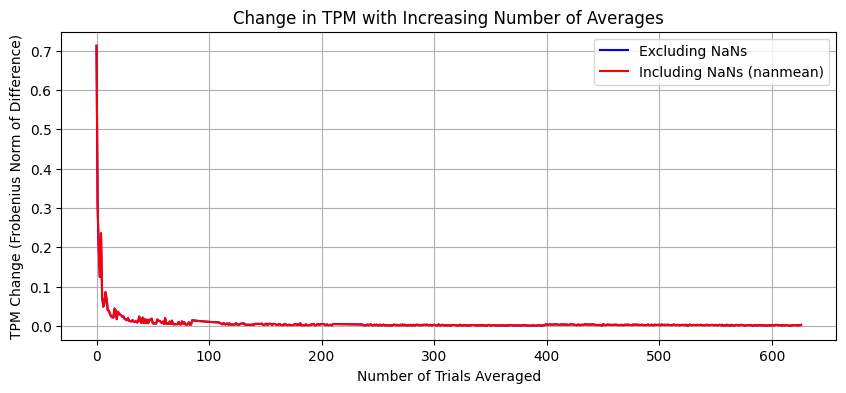

In [82]:
# Function to compute the average TPM with the option to skip or include NaNs
def compute_averaged_tpms(tpms, skip_nans=False):
    """
    Compute a list of averaged TPMs, adding one trial at a time.
    If skip_nans is True, TPMs containing NaNs are skipped in the average.
    Otherwise, nanmean is used for averaging.
    """
    averaged_tpms = []
    for i in range(1, len(tpms) + 1):
        averaged_tpm = average_tpms(tpms[:i], skip_nans=skip_nans)
        averaged_tpms.append(averaged_tpm)
    return averaged_tpms

# Compute the averaged TPMs for both methods
averaged_tpms_excluding_nans = compute_averaged_tpms(tpms, skip_nans=True)
averaged_tpms_including_nans = compute_averaged_tpms(tpms, skip_nans=False)

# Function to calculate the change in TPMs across averages
def calculate_tpm_changes(averaged_tpms):
    """
    Calculate the change in TPMs as more trials are averaged.
    """
    changes = []
    for i in range(1, len(averaged_tpms)):
        change = tpm_similarity(averaged_tpms[i-1], averaged_tpms[i])
        changes.append(change)
    return changes

# Calculate the changes for both sets of averaged TPMs
changes_excluding_nans = calculate_tpm_changes(averaged_tpms_excluding_nans)
changes_including_nans = calculate_tpm_changes(averaged_tpms_including_nans)

# Plotting the changes for both methods
plt.figure(figsize=(10, 4))
plt.plot(changes_excluding_nans, marker='', linestyle='-', color='blue', label='Excluding NaNs')
plt.plot(changes_including_nans, marker='', linestyle='-', color='red', label='Including NaNs (nanmean)')
plt.title('Change in TPM with Increasing Number of Averages')
plt.xlabel('Number of Trials Averaged')
plt.ylabel('TPM Change (Frobenius Norm of Difference)')
plt.legend()
plt.grid(True)
plt.show()

Next, let's compare this TPM with a TPM where we just average spiking across all trials

In [87]:
import numpy as np

# Function to compute the Transition Probability Matrix (TPM) for a given trial
def compute_tpm(trial_matrix):
    # Define all possible states for 3 neurons
    states = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]

    # Initialize the TPM with zeros
    tpm = np.zeros((8, 8))

    # Count transitions between states
    for t in range(trial_matrix.shape[1] - 1):
        current_state = tuple(trial_matrix[:, t])
        next_state = tuple(trial_matrix[:, t + 1])

        if current_state in states and next_state in states:
            current_index = states.index(current_state)
            next_index = states.index(next_state)
            tpm[current_index, next_index] += 1

    # Normalize the TPM by row to get probabilities
    row_sums = tpm.sum(axis=1, keepdims=True)
    tpm_normalized = np.divide(tpm, row_sums, out=np.zeros_like(tpm), where=row_sums!=0)

    return tpm_normalized

# Initializing an array to store the trial-averages (3 neurons, 250 time points)
trial_averages = np.zeros((3, 250))

# Assuming 'ys' is the list of all trial data matrices
for neuron_index in range(3):
    neuron_id = neuron_indices[neuron_index]
    for trial in ys:
        trial_averages[neuron_index] += trial[:, neuron_id]

# Converting sums to binary (0 or 1) based on the average
trial_averages_binary = (trial_averages / len(ys)) >= 0.5

# Computing the TPM for the trial-average matrix
tpm_trial_average = compute_tpm(trial_averages_binary)

plot that

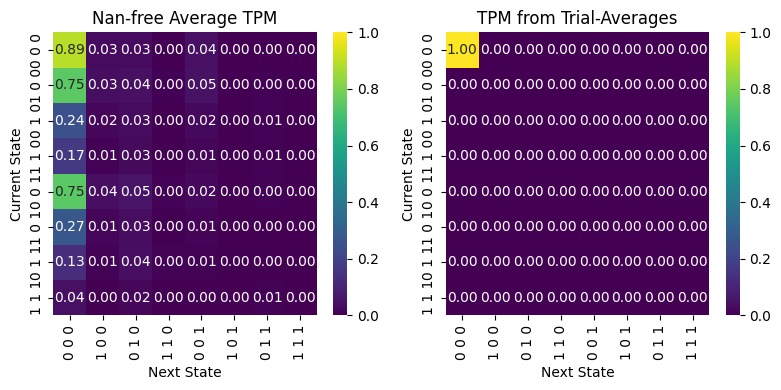

In [90]:
import seaborn as sns

# Reordering the states as per the specified order
specified_order = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (1, 1, 0), (0, 0, 1), (1, 0, 1), (0, 1, 1), (1, 1, 1)]
state_labels_ordered = [' '.join(map(str, state)) for state in specified_order]

# Function to reorder TPM according to the specified order
def reorder_tpm(tpm, order):
    # Mapping the current order to the specified order
    current_order = [(i, j, k) for i in range(2) for j in range(2) for k in range(2)]
    mapping = [current_order.index(state) for state in order]
    # Reordering the TPM
    reordered_tpm = tpm[np.ix_(mapping, mapping)]
    return reordered_tpm

# Reordering the TPMs
reordered_average_tpm = reorder_tpm(average_tpm_excluding_nans, specified_order)
reordered_trial_average_tpm = reorder_tpm(tpm_trial_average, specified_order)

# Plotting the reordered TPMs with the same scaling
vmin = min(reordered_average_tpm.min(), reordered_trial_average_tpm.min())
vmax = max(reordered_average_tpm.max(), reordered_trial_average_tpm.max())

fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Nan-free average TPM with reordered state labels
sns.heatmap(reordered_average_tpm, ax=axs[0], cmap='viridis', annot=True, fmt='.2f', xticklabels=state_labels_ordered, yticklabels=state_labels_ordered, vmin=vmin, vmax=vmax)
axs[0].set_title('Nan-free Average TPM')
axs[0].set_xlabel('Next State')
axs[0].set_ylabel('Current State')

# TPM from trial-averages with reordered state labels
sns.heatmap(reordered_trial_average_tpm, ax=axs[1], cmap='viridis', annot=True, fmt='.2f', xticklabels=state_labels_ordered, yticklabels=state_labels_ordered, vmin=vmin, vmax=vmax)
axs[1].set_title('TPM from Trial-Averages')
axs[1].set_xlabel('Next State')
axs[1].set_ylabel('Current State')

plt.tight_layout()
plt.show()

Well, it is clear from that that binary spikes are a dead end. The prevailing state is (0 0 0).

How about SDF instead?

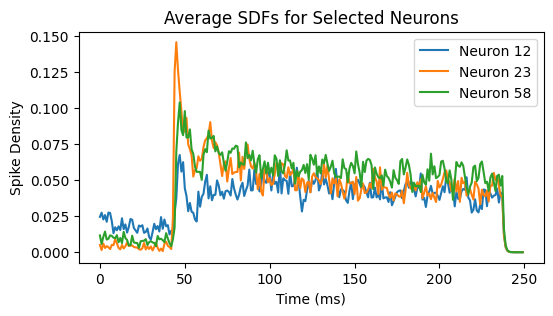

In [96]:
import scipy.signal

# Define an EPSP-shaped kernel
def create_epsp_kernel(peak_time=1, decay_time=5, total_duration=25, sampling_rate=1):
    """
    Create an EPSP-shaped kernel with specified peak time, decay time, total duration, and sampling rate.
    The kernel will have a rapid rise to a peak and an exponential decay.
    """
    time = np.arange(0, total_duration, sampling_rate)
    rise = np.exp(-time / peak_time)  # Rise part of the EPSP
    decay = np.exp(-time / decay_time)  # Decay part of the EPSP
    epsp_kernel = rise * decay
    epsp_kernel /= np.sum(epsp_kernel)  # Normalize the kernel
    return epsp_kernel

# Create the EPSP kernel
epsp_kernel = create_epsp_kernel()

# Function to convert a spike train to an SDF using the EPSP kernel
def spike_train_to_sdf(spike_train, kernel):
    """
    Convert a spike train to a spike density function (SDF) using a specified kernel.
    """
    return scipy.signal.convolve(spike_train, kernel, mode='same')

# Compute the SDFs for each trial for each of the three neurons and average them
average_sdfs = np.zeros((3, 250))  # 3 neurons, 250 time points
for neuron_index in range(3):
    neuron_id = neuron_indices[neuron_index]
    sdfs = []
    for trial in ys:
        sdf = spike_train_to_sdf(trial[:, neuron_id], epsp_kernel)
        sdfs.append(sdf)
    average_sdfs[neuron_index] = np.mean(sdfs, axis=0)

# Plotting the average SDFs of all three neurons
plt.figure(figsize=(6, 3))
for i in range(3):
    plt.plot(average_sdfs[i], label=f'Neuron {neuron_indices[i] + 1}')
plt.title('Average SDFs for Selected Neurons')
plt.xlabel('Time (ms)')
plt.ylabel('Spike Density')
plt.legend()
plt.show()

The question is to how to binarize the SDFs to get MORE but not TOO MANY up-states?